In [1]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

import elastic_database as edb
import seismic_tools as st

In [2]:
chl = edb.chlorite()

In [3]:
chl

<class 'ElasticClass.ElasticProps'>

Mineral Name: Chlorite
Reference Source: https://doi.org/10.1002/2014GL059334
Crystal System: Monoclinic
Pressure (GPa): 0.0
Temperature (°C): 25
Density (g/cm3): 2.534

Stiffness Tensor (Cij) in GPa:
[[197.8  60.7  21.1   0.    3.3   0. ]
 [ 60.7 202.3  34.1   0.    0.2   0. ]
 [ 21.1  34.1 135.1   0.    0.4   0. ]
 [  0.    0.    0.   24.5   0.    0.1]
 [  3.3   0.2   0.4   0.   24.4   0. ]
 [  0.    0.    0.    0.1   0.   70.3]]

Calculated average properties:
Bulk Modulus averages (GPa)
Upper bound (Voigt) = 85.222
Average (Hill--VRH) = 82.553
Lower bound (Reuss) = 79.883
Shear Modulus averages (GPa)
Upper bound (Voigt) = = 51.793
Average (Hill--VRH)  = 45.772
Lower bound (Reuss) = 39.751
Isotropic Average Poisson Ratio
Average (Hill--VRH)  = 0.266
Pugh's ratio
Average (Hill--VRH)  = 1.804

Anisotropy indexes
Universal Elastic Anisotropy: 1.581
Kube's Anisotropy Index (proportional): 0.595

Seismic properties (Hill averages)
Isotropic Average Vp

In [4]:
model = st.weak_polar_anisotropy(chl)

In [5]:
model

,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.025977,0.000000,7.300035,3.116033,3.111383
2,0.026454,0.067775,7.299973,3.116277,3.111456
3,0.026922,0.135550,7.299911,3.116522,3.111529
4,0.027383,0.203325,7.299849,3.116766,3.111601
...,...,...,...,...,...
79995,1.570740,5.488482,8.996070,3.109423,6.015781
79996,1.570753,5.556257,8.996070,3.109423,6.015781
79997,1.570765,5.624032,8.996070,3.109423,6.015781
79998,1.570778,5.691807,8.996070,3.109423,6.015781


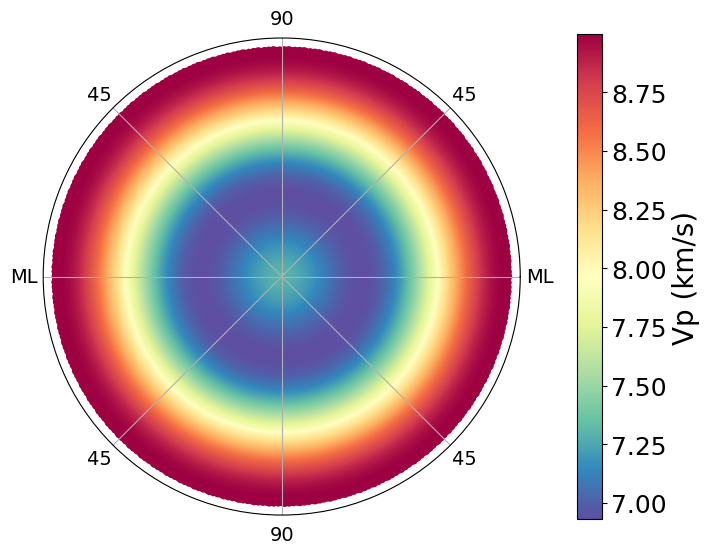

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model['azimuthal_ang'],
                model['polar_ang'],
                c=model['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

# rough contour 
# cs = ax.tricontour(model['azimuthal_ang'],
#                    model['polar_ang'],
#                    model['Vp'],
#                    levels=[7.0, 7.5, 8.0, 8.5],
#                    linestyles="solid", colors="k", linewidths=2.0)
# ax.clabel(cs, cs.levels, inline=True, fontsize=10)

In [7]:
model2 = st.polar_anisotropy(chl)
model2

c:\Users\Marco\Documents\GitHub\PyRockWave\src\seismic_tools.py:192: RuntimeWarning: invalid value encountered in sqrt
  D = np.sqrt(first_term + second_term + third_term)


,polar_ang,azimuthal_ang,Vp,Vsv,Vsh
0,0.000000,0.000000,7.301706,3.109423,3.109423
1,0.025977,0.000000,7.299763,3.116661,3.111383
2,0.026454,0.067775,7.299691,3.116929,3.111455
3,0.026922,0.135550,7.299619,3.117197,3.111528
4,0.027383,0.203325,7.299547,3.117465,3.111600
...,...,...,...,...,...
79995,1.570740,5.488482,8.608665,3.690230,5.267134
79996,1.570753,5.556257,8.608665,3.690230,5.267134
79997,1.570765,5.624032,8.608665,3.690230,5.267134
79998,1.570778,5.691807,8.608665,3.690230,5.267134


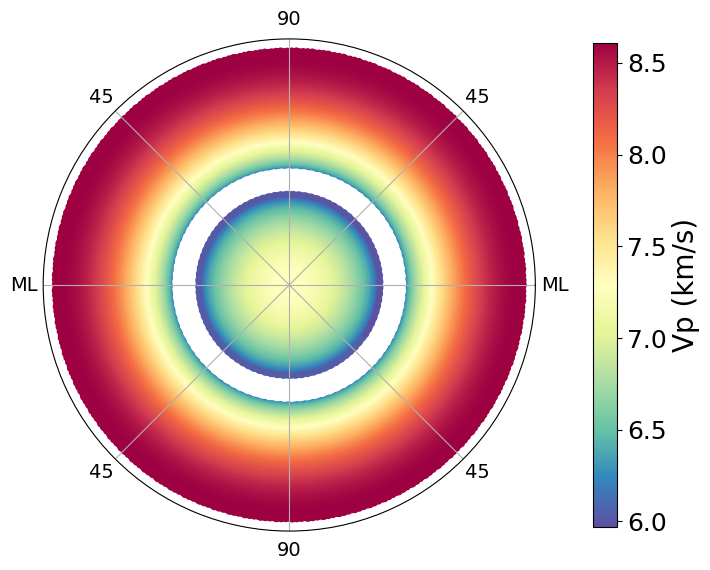

In [8]:
fig2, ax = plt.subplots(subplot_kw={'projection': 'polar'}, constrained_layout=True, figsize=(7,7))

ax.set_theta_direction(-1)
ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4))
ax.set_xticklabels(['ML', '45', '90', '45', 'ML', '45', '90', '45'], fontsize=14)
ax.set_yticks([])

cm = ax.scatter(model2['azimuthal_ang'],
                model2['polar_ang'],
                c=model2['Vp'],
                s=15,
                cmap='Spectral_r')

# add color bar
cbar = fig.colorbar(cm, ax=ax, shrink=0.7, location='right')
cbar.set_label('Vp (km/s)', fontsize=20)
cbar.ax.tick_params(labelsize=18)

## Test equispaced S2 grid

In [9]:
azimuths, polar = st.equispaced_S2_grid(n=100_000, degrees=True, hemisphere='upper')

In [10]:
polar

array([ 0.        ,  1.33129382,  1.3557244 , ..., 89.99856797,
       89.99914078, 89.99971359])

In [11]:
azimuths

array([  0.        ,   0.        ,   3.88322208, ..., 226.67485678,
       230.55807886, 234.44130094])